# Stock price prediction using LSTM

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 20,10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler

In [2]:
#  Read the dataset:
df = pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


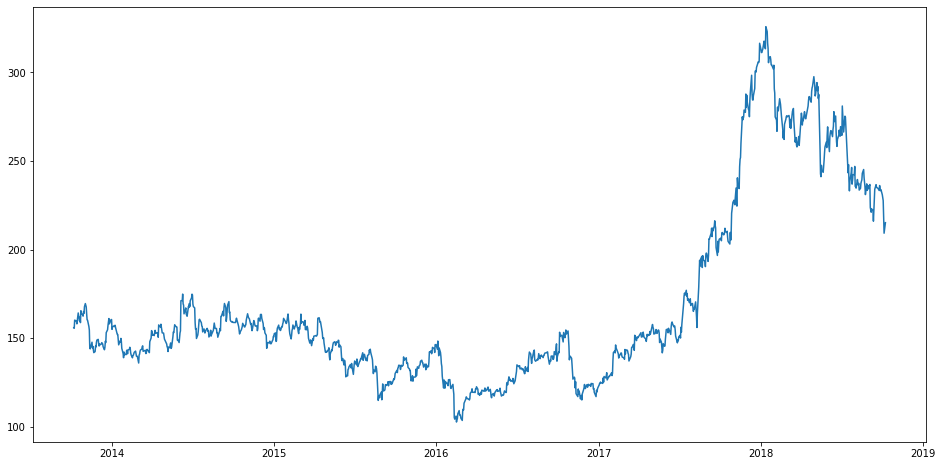

In [4]:
# Analyze the closing prices from dataframe:
df["Date"] = pd.to_datetime(df.Date, format = "%Y-%m-%d")
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'], label = 'Close Price History')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1235 non-null   datetime64[ns]
 1   Open                  1235 non-null   float64       
 2   High                  1235 non-null   float64       
 3   Low                   1235 non-null   float64       
 4   Last                  1235 non-null   float64       
 5   Close                 1235 non-null   float64       
 6   Total Trade Quantity  1235 non-null   float64       
 7   Turnover (Lacs)       1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 86.8 KB


In [6]:
# Sort the dataset on date time and filter “Date” and “Close” columns:
data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0,len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
  new_dataset['Date'][i] = data['Date'][i]
  new_dataset['Close'][i] = data['Close'][i]

In [7]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79


In [8]:
new_dataset

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45
...,...,...
1230,2018-10-01 00:00:00,230.9
1231,2018-10-03 00:00:00,227.6
1232,2018-10-04 00:00:00,218.2
1233,2018-10-05 00:00:00,209.2


In [9]:
len(data)

1235

In [10]:
new_dataset['Date'][0]

Timestamp('2013-10-08 00:00:00')

In [11]:
data['Date'][0]

Timestamp('2013-10-08 00:00:00')

In [12]:
new_dataset['Close'][40]

146.65

In [13]:
data['Close'][40]

146.65

In [14]:
new_dataset.values 

array([[Timestamp('2013-10-08 00:00:00'), 155.8],
       [Timestamp('2013-10-09 00:00:00'), 155.55],
       [Timestamp('2013-10-10 00:00:00'), 160.15],
       ...,
       [Timestamp('2018-10-04 00:00:00'), 218.2],
       [Timestamp('2018-10-05 00:00:00'), 209.2],
       [Timestamp('2018-10-08 00:00:00'), 215.15]], dtype=object)

In [15]:
# Normalize the new filtered dataset:
scaler = MinMaxScaler(feature_range=(0,1)) 
final_dataset = new_dataset['Close'].values

train_data = final_dataset[0:987]
valid_data = final_dataset[987:]

new_dataset.index = new_dataset.Date 
new_dataset.drop("Date",axis=1,inplace=True)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(final_dataset).reshape(-1,1))

x_train_data, y_train_data = [], []

for i in range(60,len(train_data)): 
  x_train_data.append(scaled_data[i-60:i,0]) 
  y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data = np.array(x_train_data),np.array(y_train_data)

x_train_data = np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [16]:
final_dataset

array([155.8, 155.55, 160.15, ..., 218.2, 209.2, 215.15], dtype=object)

In [17]:
final_dataset

array([155.8, 155.55, 160.15, ..., 218.2, 209.2, 215.15], dtype=object)

In [18]:
scaled_data

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [19]:
x_train_data, 

(array([[[0.23823398],
         [0.2371134 ],
         [0.25773196],
         ...,
         [0.25907665],
         [0.25930076],
         [0.23442403]],
 
        [[0.2371134 ],
         [0.25773196],
         [0.25728373],
         ...,
         [0.25930076],
         [0.23442403],
         [0.24069924]],
 
        [[0.25773196],
         [0.25728373],
         [0.25459435],
         ...,
         [0.23442403],
         [0.24069924],
         [0.24271627]],
 
        ...,
 
        [[0.24697445],
         [0.28641865],
         [0.29964142],
         ...,
         [0.45047064],
         [0.46234872],
         [0.46526221]],
 
        [[0.28641865],
         [0.29964142],
         [0.31869117],
         ...,
         [0.46234872],
         [0.46526221],
         [0.45853877]],
 
        [[0.29964142],
         [0.31869117],
         [0.32608696],
         ...,
         [0.46526221],
         [0.45853877],
         [0.4787091 ]]]),)

In [20]:
y_train_data

array([0.24069924, 0.24271627, 0.24137158, 0.24406096, 0.2447333 ,
       0.23890632, 0.22523532, 0.22142537, 0.22142537, 0.20797848,
       0.19520394, 0.20461676, 0.20259973, 0.21156432, 0.20416853,
       0.18646347, 0.17346481, 0.16270731, 0.17705065, 0.16943075,
       0.17189601, 0.17055132, 0.18153294, 0.18108472, 0.17256835,
       0.1824294 , 0.18354998, 0.18915285, 0.18556701, 0.17525773,
       0.16987898, 0.16248319, 0.16831017, 0.16898252, 0.17234424,
       0.17637831, 0.17951591, 0.17279247, 0.16651726, 0.16606903,
       0.14926042, 0.16920663, 0.17144778, 0.17884357, 0.18220529,
       0.18444644, 0.19049753, 0.19273868, 0.17884357, 0.17951591,
       0.18153294, 0.1732407 , 0.17368893, 0.18265352, 0.18377409,
       0.18018826, 0.18041237, 0.17974003, 0.17548185, 0.20327208,
       0.21246078, 0.23128642, 0.2279247 , 0.21918422, 0.22209771,
       0.21873599, 0.23195876, 0.22613178, 0.22456298, 0.22590766,
       0.21447781, 0.24562976, 0.23980278, 0.24742268, 0.23957

In [21]:
train_data

array([155.8, 155.55, 160.15, 160.05, 159.45, 158.05, 162.0, 164.2, 159.6,
       161.85, 158.75, 165.45, 163.85, 163.25, 162.4, 165.0, 164.0, 167.7,
       169.5, 167.6, 163.55, 160.35, 160.1, 156.55, 154.55, 144.3, 143.95,
       147.7, 144.55, 145.35, 143.65, 141.8, 142.4, 145.5, 145.05, 147.65,
       148.9, 149.3, 146.8, 145.55, 146.65, 146.2, 146.7, 147.45, 147.0,
       146.75, 145.15, 143.45, 144.75, 148.2, 147.5, 153.1, 154.7, 157.25,
       161.05, 158.05, 159.8, 160.45, 160.5, 154.95, 156.35, 156.8, 156.5,
       157.1, 157.25, 155.95, 152.9, 152.05, 152.05, 149.05, 146.2, 148.3,
       147.85, 149.85, 148.2, 144.25, 141.35, 138.95, 142.15, 140.45,
       141.0, 140.7, 143.15, 143.05, 141.15, 143.35, 143.6, 144.85,
       144.05, 141.75, 140.55, 138.9, 140.2, 140.35, 141.1, 142.0, 142.7,
       141.2, 139.8, 139.7, 135.95, 140.4, 140.9, 142.55, 143.3, 143.8,
       145.15, 145.65, 142.55, 142.7, 143.15, 141.3, 141.4, 143.4, 143.65,
       142.85, 142.9, 142.75, 141.8, 148.0,

In [22]:
valid_data

array([208.3, 208.45, 209.4, 212.0, 210.25, 209.6, 210.3, 206.8, 204.6,
       203.1, 209.65, 205.3, 209.8, 220.5, 226.8, 226.95, 227.8, 226.35,
       225.3, 234.7, 225.0, 224.5, 240.45, 236.15, 234.4, 246.7, 250.9,
       251.95, 259.9, 274.9, 273.15, 274.05, 274.8, 278.7, 277.45, 287.75,
       280.2, 287.1, 283.55, 279.05, 279.95, 274.95, 284.0, 288.45,
       298.35, 287.8, 284.45, 284.3, 286.85, 290.85, 300.65, 300.85,
       300.15, 302.75, 305.95, 305.55, 306.6, 316.4, 312.9, 311.15, 311.2,
       312.25, 312.95, 317.6, 315.3, 314.1, 313.3, 325.75, 323.0, 316.4,
       313.55, 305.45, 308.35, 308.85, 307.2, 304.25, 304.25, 301.8,
       304.0, 290.65, 288.35, 274.85, 273.1, 266.7, 280.15, 280.45,
       278.25, 285.1, 281.95, 279.05, 275.6, 267.95, 262.85, 266.6,
       262.15, 270.7, 273.5, 275.0, 275.5, 274.85, 275.65, 274.15, 268.9,
       273.4, 268.35, 276.05, 278.2, 278.5, 279.6, 272.4, 260.6, 262.05,
       263.2, 258.85, 257.9, 262.2, 263.8, 258.75, 276.95, 274.8, 270.2

In [23]:
# Build and train the LSTM model:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


lstm_model.compile(optimizer='Adam', loss='mean_squared_error')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

927/927 - 19s - loss: 0.0013


In [24]:
# Take a sample of a dataset to make stock price predictions using the LSTM model:

X_test=[]

for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)


X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [25]:
# Save the LSTM model:

lstm_model.save("saved_model.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


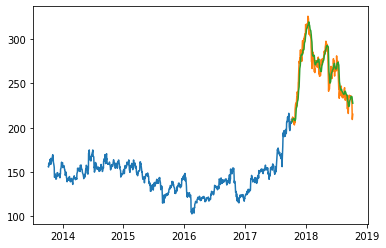

In [26]:
# Visualize the predicted stock costs with actual stock costs:

train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])